In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from util import Compare, getError, getdata
from LinearRegression import KfoldLinearRegression
from RandomForest import KfoldRandomForest

In [8]:
df1 = getdata("./data/UseData.csv")
df1

,Day,S,T,K,Value,tau,rate
0,44834.0,2.65,0.24384,2.50,0.2092,0.0191,1.06000
1,44834.0,2.65,0.24384,2.55,0.1734,0.0191,1.03922
2,44834.0,2.65,0.24384,2.60,0.1400,0.0191,1.01923
3,44834.0,2.65,0.24384,2.65,0.1111,0.0191,1.00000
4,44834.0,2.65,0.24384,2.70,0.0882,0.0191,0.98148
...,...,...,...,...,...,...,...
31729,44075.0,3.40,0.15616,3.40,0.1322,0.0250,1.00000
31730,44075.0,3.40,0.15616,3.50,0.0924,0.0250,0.97143
31731,44075.0,3.40,0.15616,3.60,0.0640,0.0250,0.94444
31732,44075.0,3.40,0.15616,3.70,0.0415,0.0250,0.91892


In [9]:
X = df1.drop(["Day","Value"], axis=1)  # 选择特征值和标签值
Y = df1.Value
X

,S,T,K,tau,rate
0,2.65,0.24384,2.50,0.0191,1.06000
1,2.65,0.24384,2.55,0.0191,1.03922
2,2.65,0.24384,2.60,0.0191,1.01923
3,2.65,0.24384,2.65,0.0191,1.00000
4,2.65,0.24384,2.70,0.0191,0.98148
...,...,...,...,...,...
31729,3.40,0.15616,3.40,0.0250,1.00000
31730,3.40,0.15616,3.50,0.0250,0.97143
31731,3.40,0.15616,3.60,0.0250,0.94444
31732,3.40,0.15616,3.70,0.0250,0.91892


In [10]:
error1 = [0, 0, 0, 0]
temp = []
for train_index, test_index in KFold(n_splits=5, random_state=7, shuffle=True).split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    error1 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1,"LRPrediction",predictions)
    temp.append(Y_test)
    
error1 /= 5
print("###############Error of LinearRegression###########")
print("MAE  = ", error1[0])
print("RMSE = ", error1[1])
print("MPE  = ", error1[2])
print("MAPE = ", error1[3])

temp = pd.concat(temp)
df2 =  pd.concat([df1.drop(['Value'],axis=1), temp], axis=1)
df2.dropna()

###############Error of LinearRegression###########
MAE  =  0.033376307805953825
RMSE =  0.04329454728865514
MPE  =  6.789352548806908
MAPE =  9.876618850205256


,Day,S,T,K,tau,rate,Value,LRPrediction
0,44834.0,2.65,0.24384,2.50,0.0191,1.06000,0.2092,0.234633
1,44834.0,2.65,0.24384,2.55,0.0191,1.03922,0.1734,0.196384
2,44834.0,2.65,0.24384,2.60,0.0191,1.01923,0.1400,0.160643
3,44834.0,2.65,0.24384,2.65,0.0191,1.00000,0.1111,0.126835
4,44834.0,2.65,0.24384,2.70,0.0191,0.98148,0.0882,0.094724
...,...,...,...,...,...,...,...,...
31729,44075.0,3.40,0.15616,3.40,0.0250,1.00000,0.1322,0.143083
31730,44075.0,3.40,0.15616,3.50,0.0250,0.97143,0.0924,0.102911
31731,44075.0,3.40,0.15616,3.60,0.0250,0.94444,0.0640,0.066801
31732,44075.0,3.40,0.15616,3.70,0.0250,0.91892,0.0415,0.034982


In [6]:
error2 = [0, 0, 0, 0]
temp=[]
for train_index, test_index in KFold(n_splits=5,shuffle = True,random_state = 17).split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    model = RandomForestRegressor(
        n_estimators=190,
        max_depth=12,
        max_features='log2',
        random_state=42,
        min_samples_leaf=1
    )
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    error2 += getError(predictions, np.array(Y_test))
    Y_test = pd.DataFrame(Y_test)
    Y_test.insert(1,"RFPrediction",predictions)
    temp.append(Y_test)
error2 /=5
print("#############Error of Random Forest################")
print("MAE  = ", error2[0])
print("RMSE = ", error2[1])
print("MPE  = ", error2[2])
print("MAPE = ", error2[3])

temp = pd.concat(temp)
df3 =  pd.concat([df2.drop(['Value'],axis=1), temp], axis=1)
df3.dropna()


KeyboardInterrupt: 

In [11]:
df3 = df3[["Day","S","K","T","tau","rate","Value","LRPrediction","RFPrediction"]]
df3.to_csv("./data/Prediction.csv",index=False)

NameError: name 'df3' is not defined

In [16]:
MAE = [0.023101468272044543,
       0.023105118084496515,
       0.024742148218510115,
       0.033376307805953825,
       0.013984238339611002,
       0.02908730449490506

       ]
RMSE = [0.034132376241153055,
        0.03415686219082014,
        0.032479630646417776,
        0.04329454728865514,
        0.020674241243774823,
        0.04211617651901435

        ]
MAPE = [0.32470574480807013,
        0.32479351454969907,
        0.32029402411408864,
        9.876618850205256,
        0.5813623835454218,
        0.5674932621783584

        ]


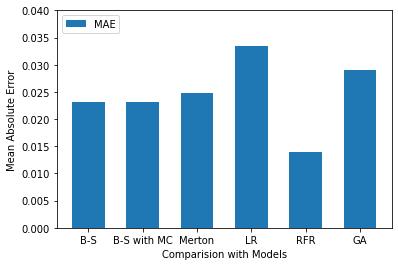

In [35]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 1
# 每种类型的柱状图宽度
width = total_width / n


# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x + 0*width, MAE, width=width, label="MAE")
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper left')
plt.xlabel("Comparision with Models")
plt.ylabel("Mean Absolute Error")
plt.ylim(0,0.04)
plt.savefig('./data/MAE.png', dpi=500)
# 显示柱状图
plt.show()

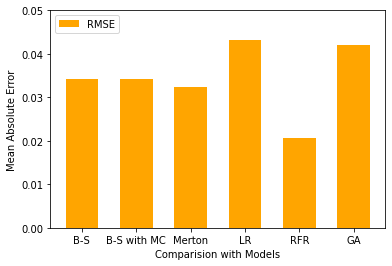

In [33]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 1
# 每种类型的柱状图宽度
width = total_width / n


# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x + 0*width, RMSE, width=width, label="RMSE",color= "orange")
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper left')
plt.xlabel("Comparision with Models")
plt.ylabel("Mean Absolute Error")
plt.ylim(0,0.05)
plt.savefig('./data/RMSE.png', dpi=500)
# 显示柱状图
plt.show()

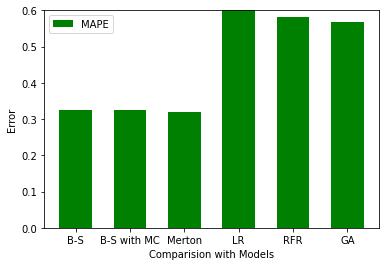

In [36]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 1
# 每种类型的柱状图宽度
width = total_width / n


# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x + 0*width, MAPE, width=width, label="MAPE",color = 'green')
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper left')
plt.xlabel("Comparision with Models")
plt.ylabel("Mean Absolute Percentage Error")
plt.ylim(0,0.6)
plt.savefig('./data/MAPE.png', dpi=500)
# 显示柱状图
plt.show()

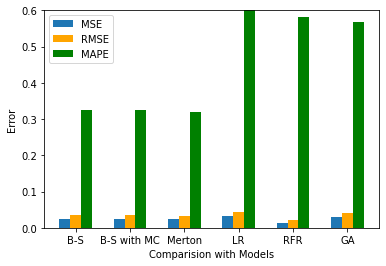

In [34]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 3
# 每种类型的柱状图宽度
width = total_width / n


# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x, MSE, width=width, label="MSE" )
plt.bar(x + width, RMSE, width=width, label="RMSE",color = "orange")
plt.bar(x + 2*width, MAPE, width=width, label="MAPE",color = 'green')
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper left')
plt.xlabel("Comparision with Models")
plt.ylabel("Error")
plt.ylim(0,0.6)
plt.savefig('./data/ERROR.png', dpi=500)
# 显示柱状图
plt.show()

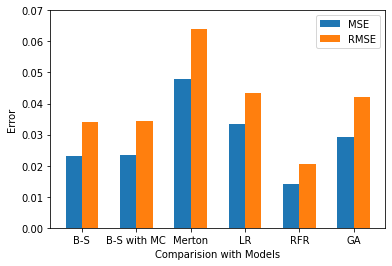

In [ ]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 2
# 每种类型的柱状图宽度
width = total_width / n

list1 = MSE
list2 = RMSE
# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x, list1, width=width, label="MSE" )
plt.bar(x + width, list2, width=width, label="RMSE")
#plt.bar(x + 2*width, c, width=width, label="c")
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper right')
plt.xlabel("Comparision with Models")
plt.ylabel("Error",)
plt.ylim(0,0.07)
plt.savefig('./data/plot1.png', dpi=500)
# 显示柱状图
plt.show()


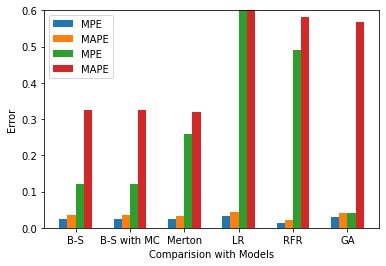

In [ ]:
size = 6

x = np.arange(size)

# 有a/b两种类型的数据，n设置为2
total_width, n = 0.6, 4
# 每种类型的柱状图宽度
width = total_width / n


# 重新设置x轴的坐标
x = x - (total_width - width) / 2
plt.rcParams['font.serif'] = ['Times New Roman']
# 画柱状图
plt.bar(x, MSE, width=width, label="MPE" )
plt.bar(x + width, RMSE, width=width, label="MAPE")
plt.bar(x + 2*width, MPE, width=width, label="MPE")
plt.bar(x + 3*width, MAPE, width=width, label="MAPE")
plt.xticks(np.arange(6), ('B-S', 'B-S with MC', 'Merton', 'LR', "RFR","GA"))
# 显示图例
# plt.figure(dpi=300,figsize=(24,24))
plt.legend(loc='upper left')
plt.xlabel("Comparision with Models")
plt.ylabel("Error")
plt.ylim(0,0.6)
plt.savefig('./data/ERROR.png', dpi=500)
# 显示柱状图
plt.show()

In [ ]:
df4 = df3.drop(["S","tau","T","rate"],axis=1)

t1 = np.array(df4[df4["K"] == 2.5][["Value","LRPrediction","RFPrediction"]])
t1 = t1[15:22]
t2 = np.array(df4[df4["K"] == 2.75][["Value","LRPrediction","RFPrediction"]])
t2 = t2[15:22]
t3 = np.array(df4[df4["K"] == 3.0][["Value","LRPrediction","RFPrediction"]])
t3 = t3[15:22]

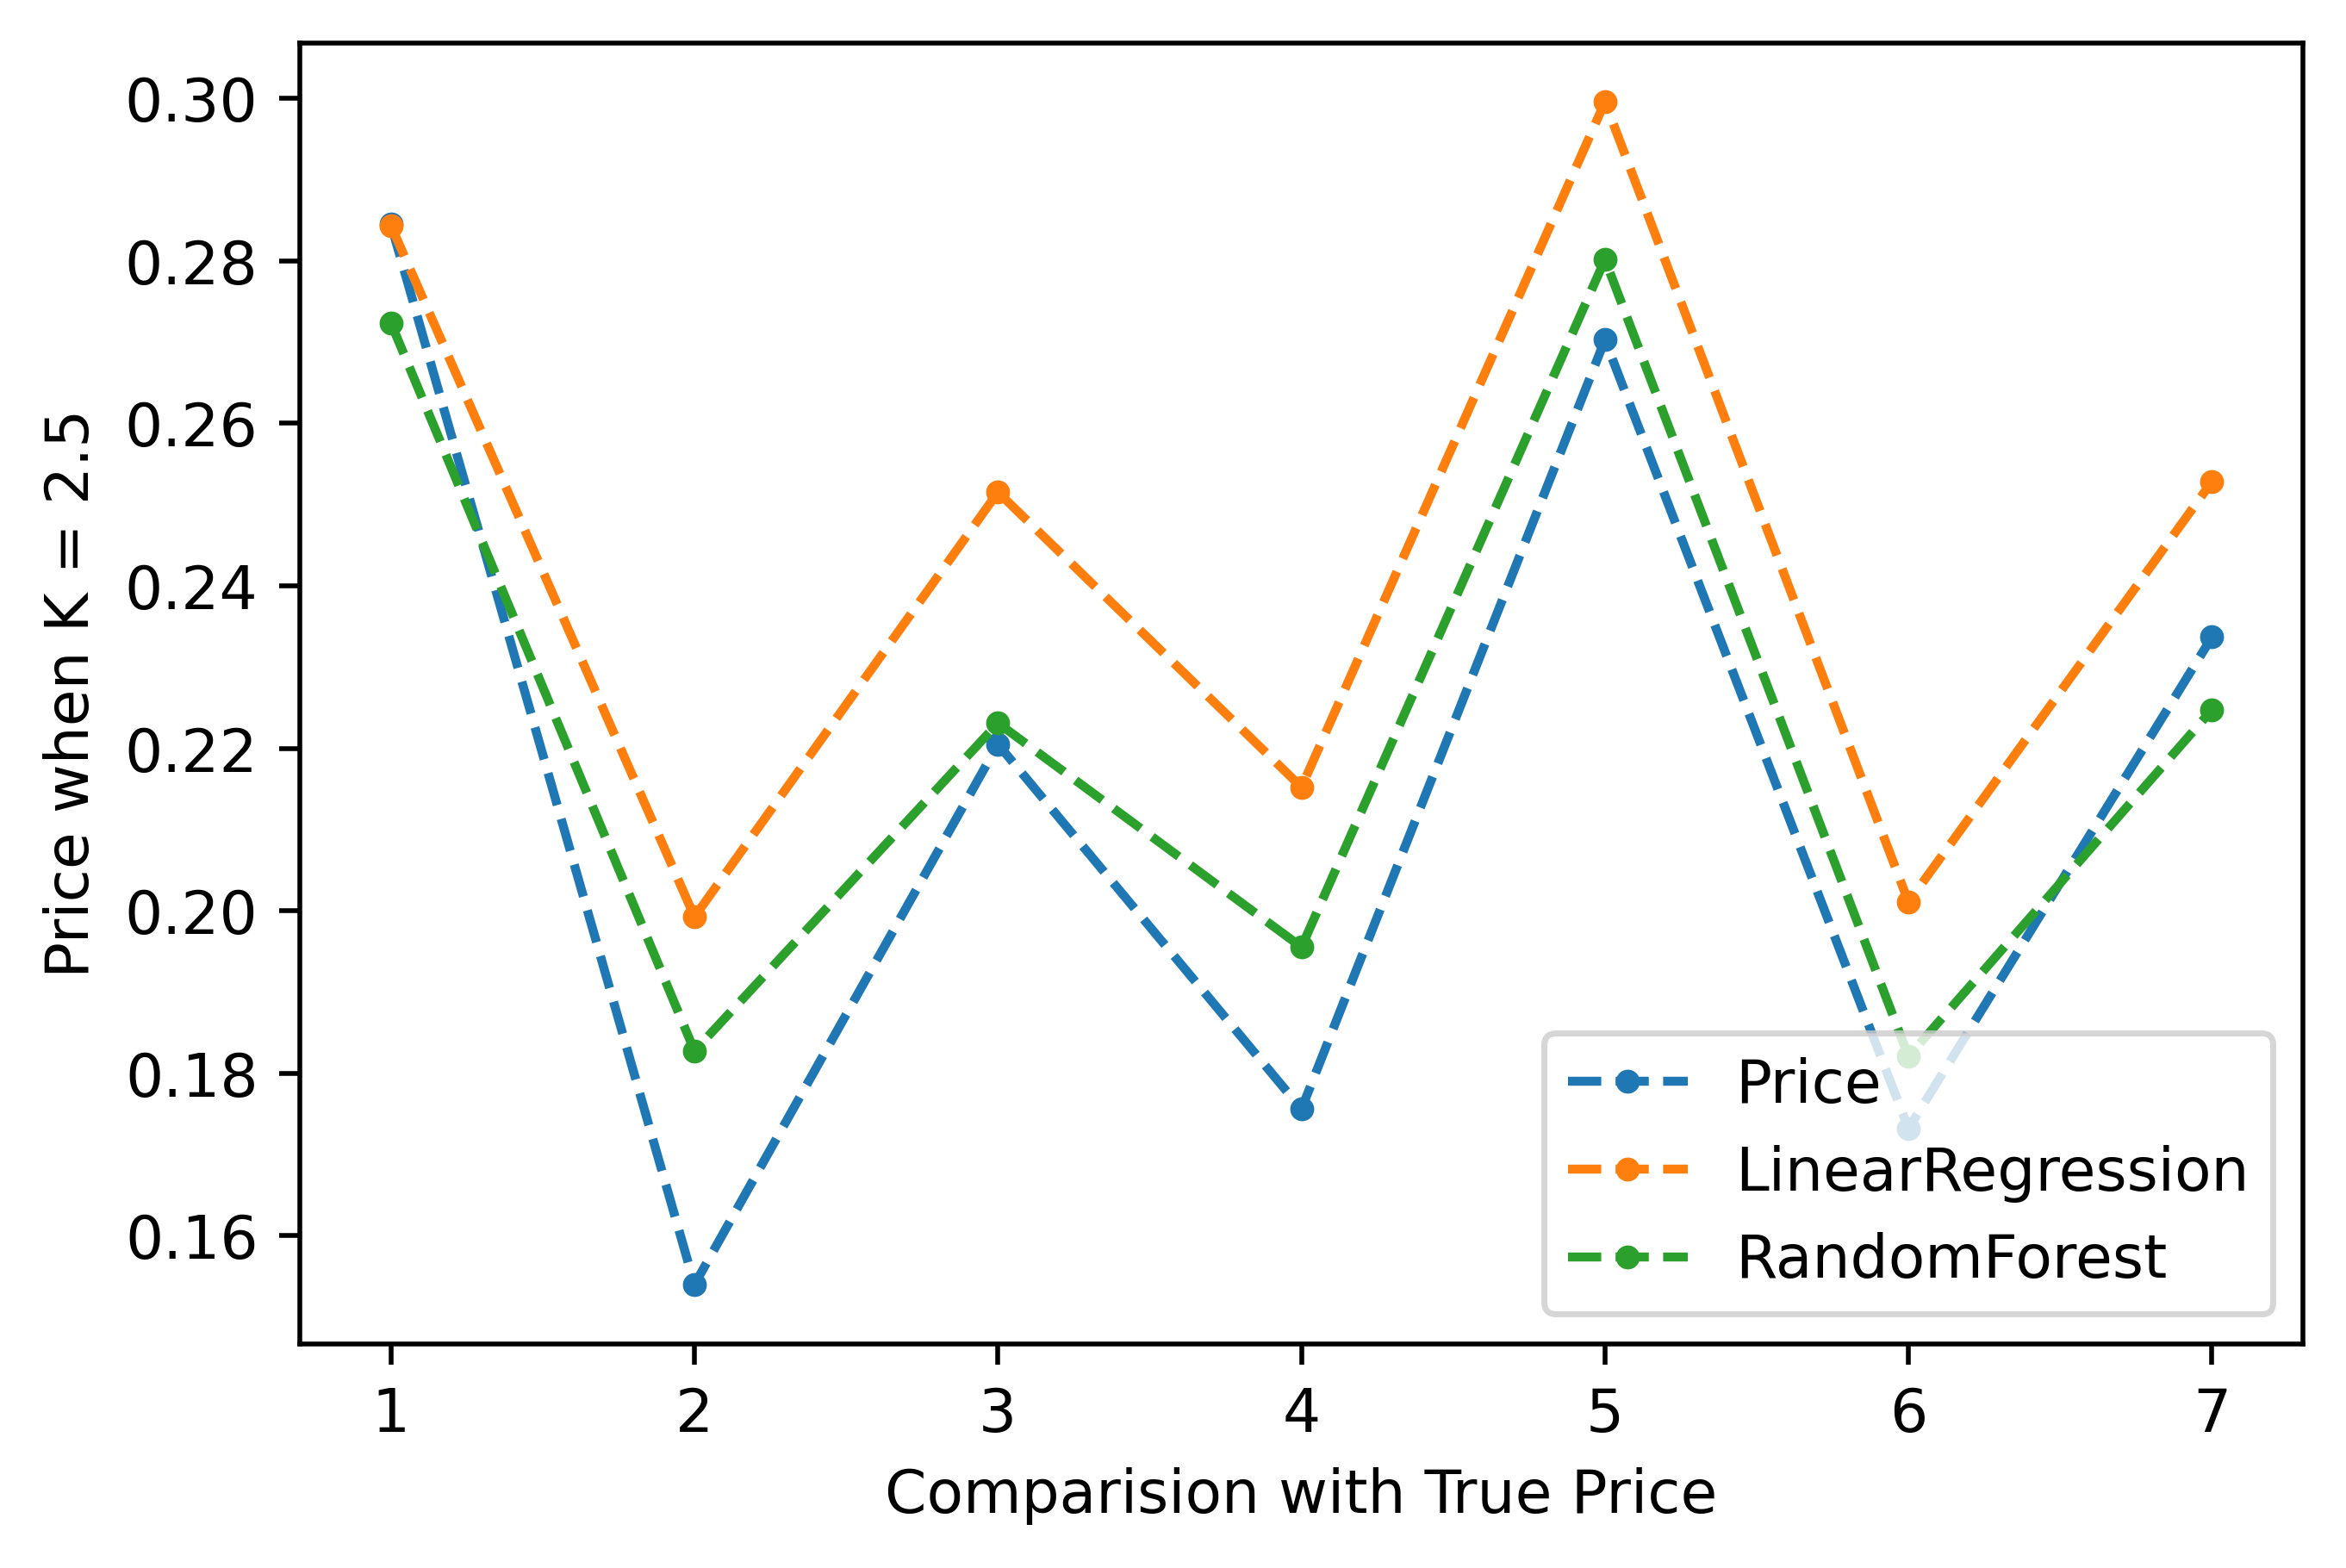

In [ ]:

fig=plt.figure(dpi=500)
x=list(np.arange(1, 8))
plt.plot(x, t1.T[0],ls = "--",marker='.',label="Price")
plt.plot(x, t1.T[1],ls = "--",marker='.',label="LinearRegression")
plt.plot(x, t1.T[2],ls = "--",marker='.',label="RandomForest")
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 2.5")
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价2500一周预测图")


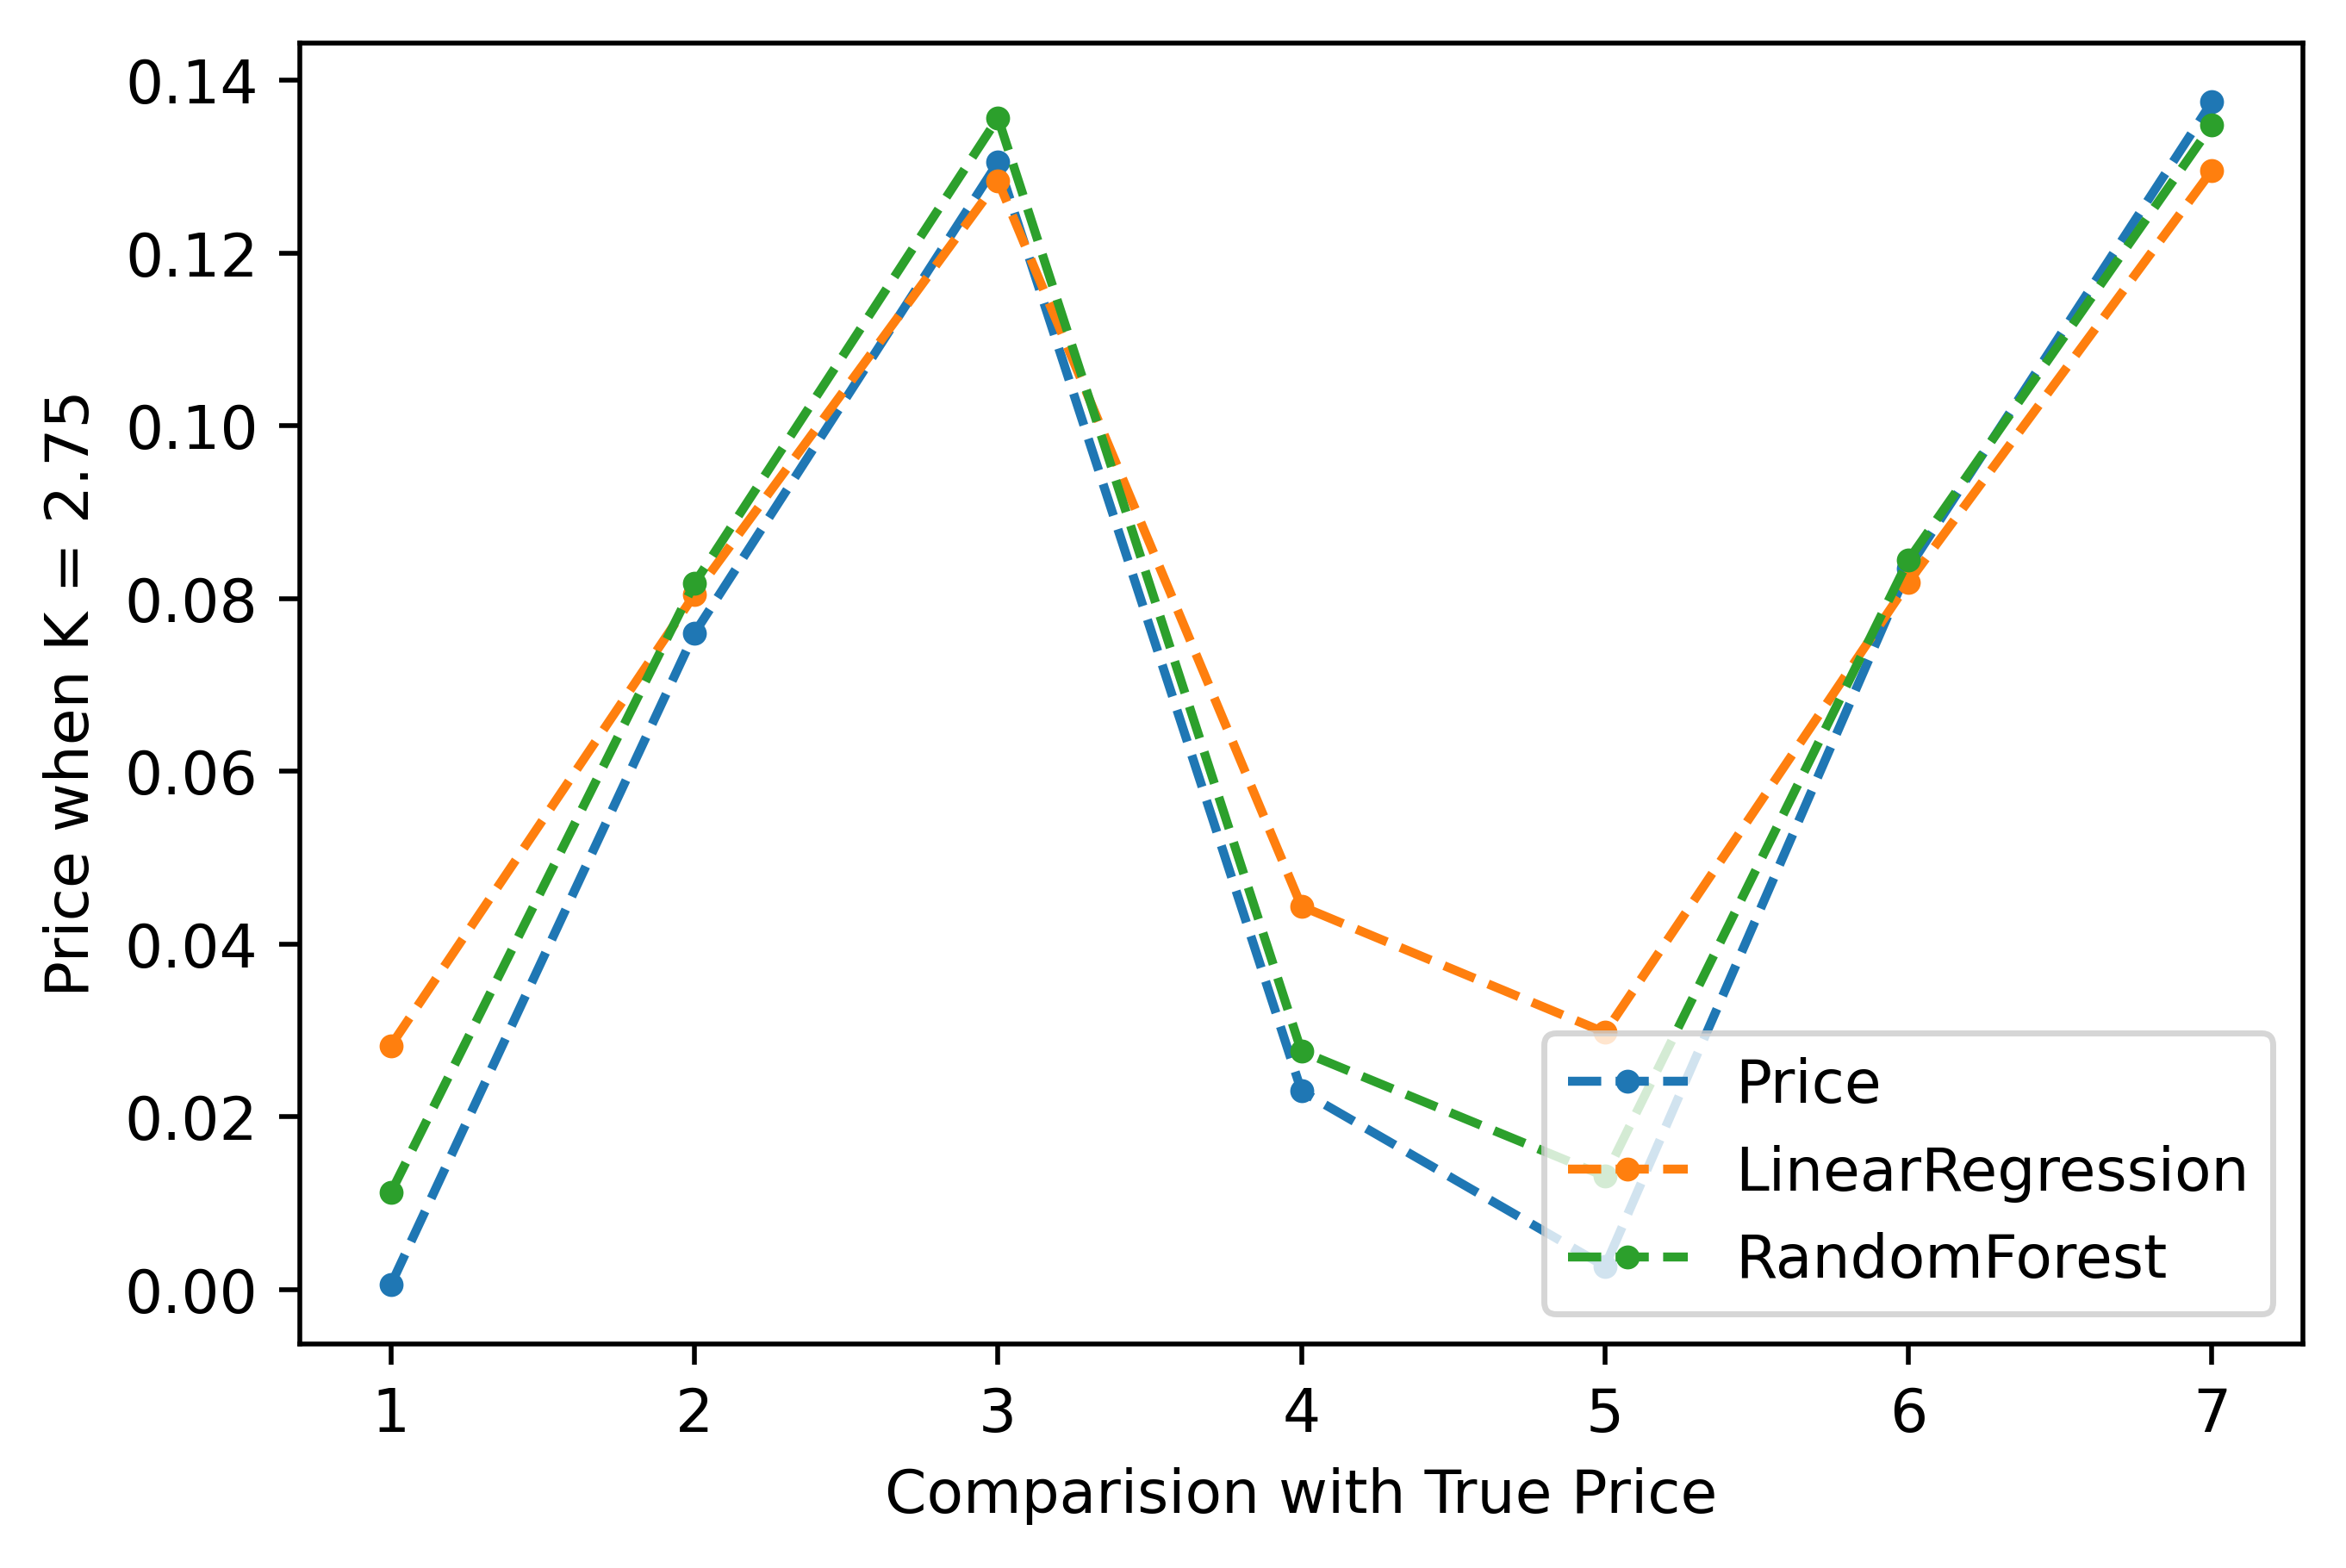

In [ ]:
fig=plt.figure(dpi=500)
x=list(np.arange(1, 8))
plt.plot(x, t2.T[0],ls = "--",marker='.',label="Price")
plt.plot(x, t2.T[1],ls = "--",marker='.',label="LinearRegression")
plt.plot(x, t2.T[2],ls = "--",marker='.',label="RandomForest")
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 2.75")
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价2750一周预测图")

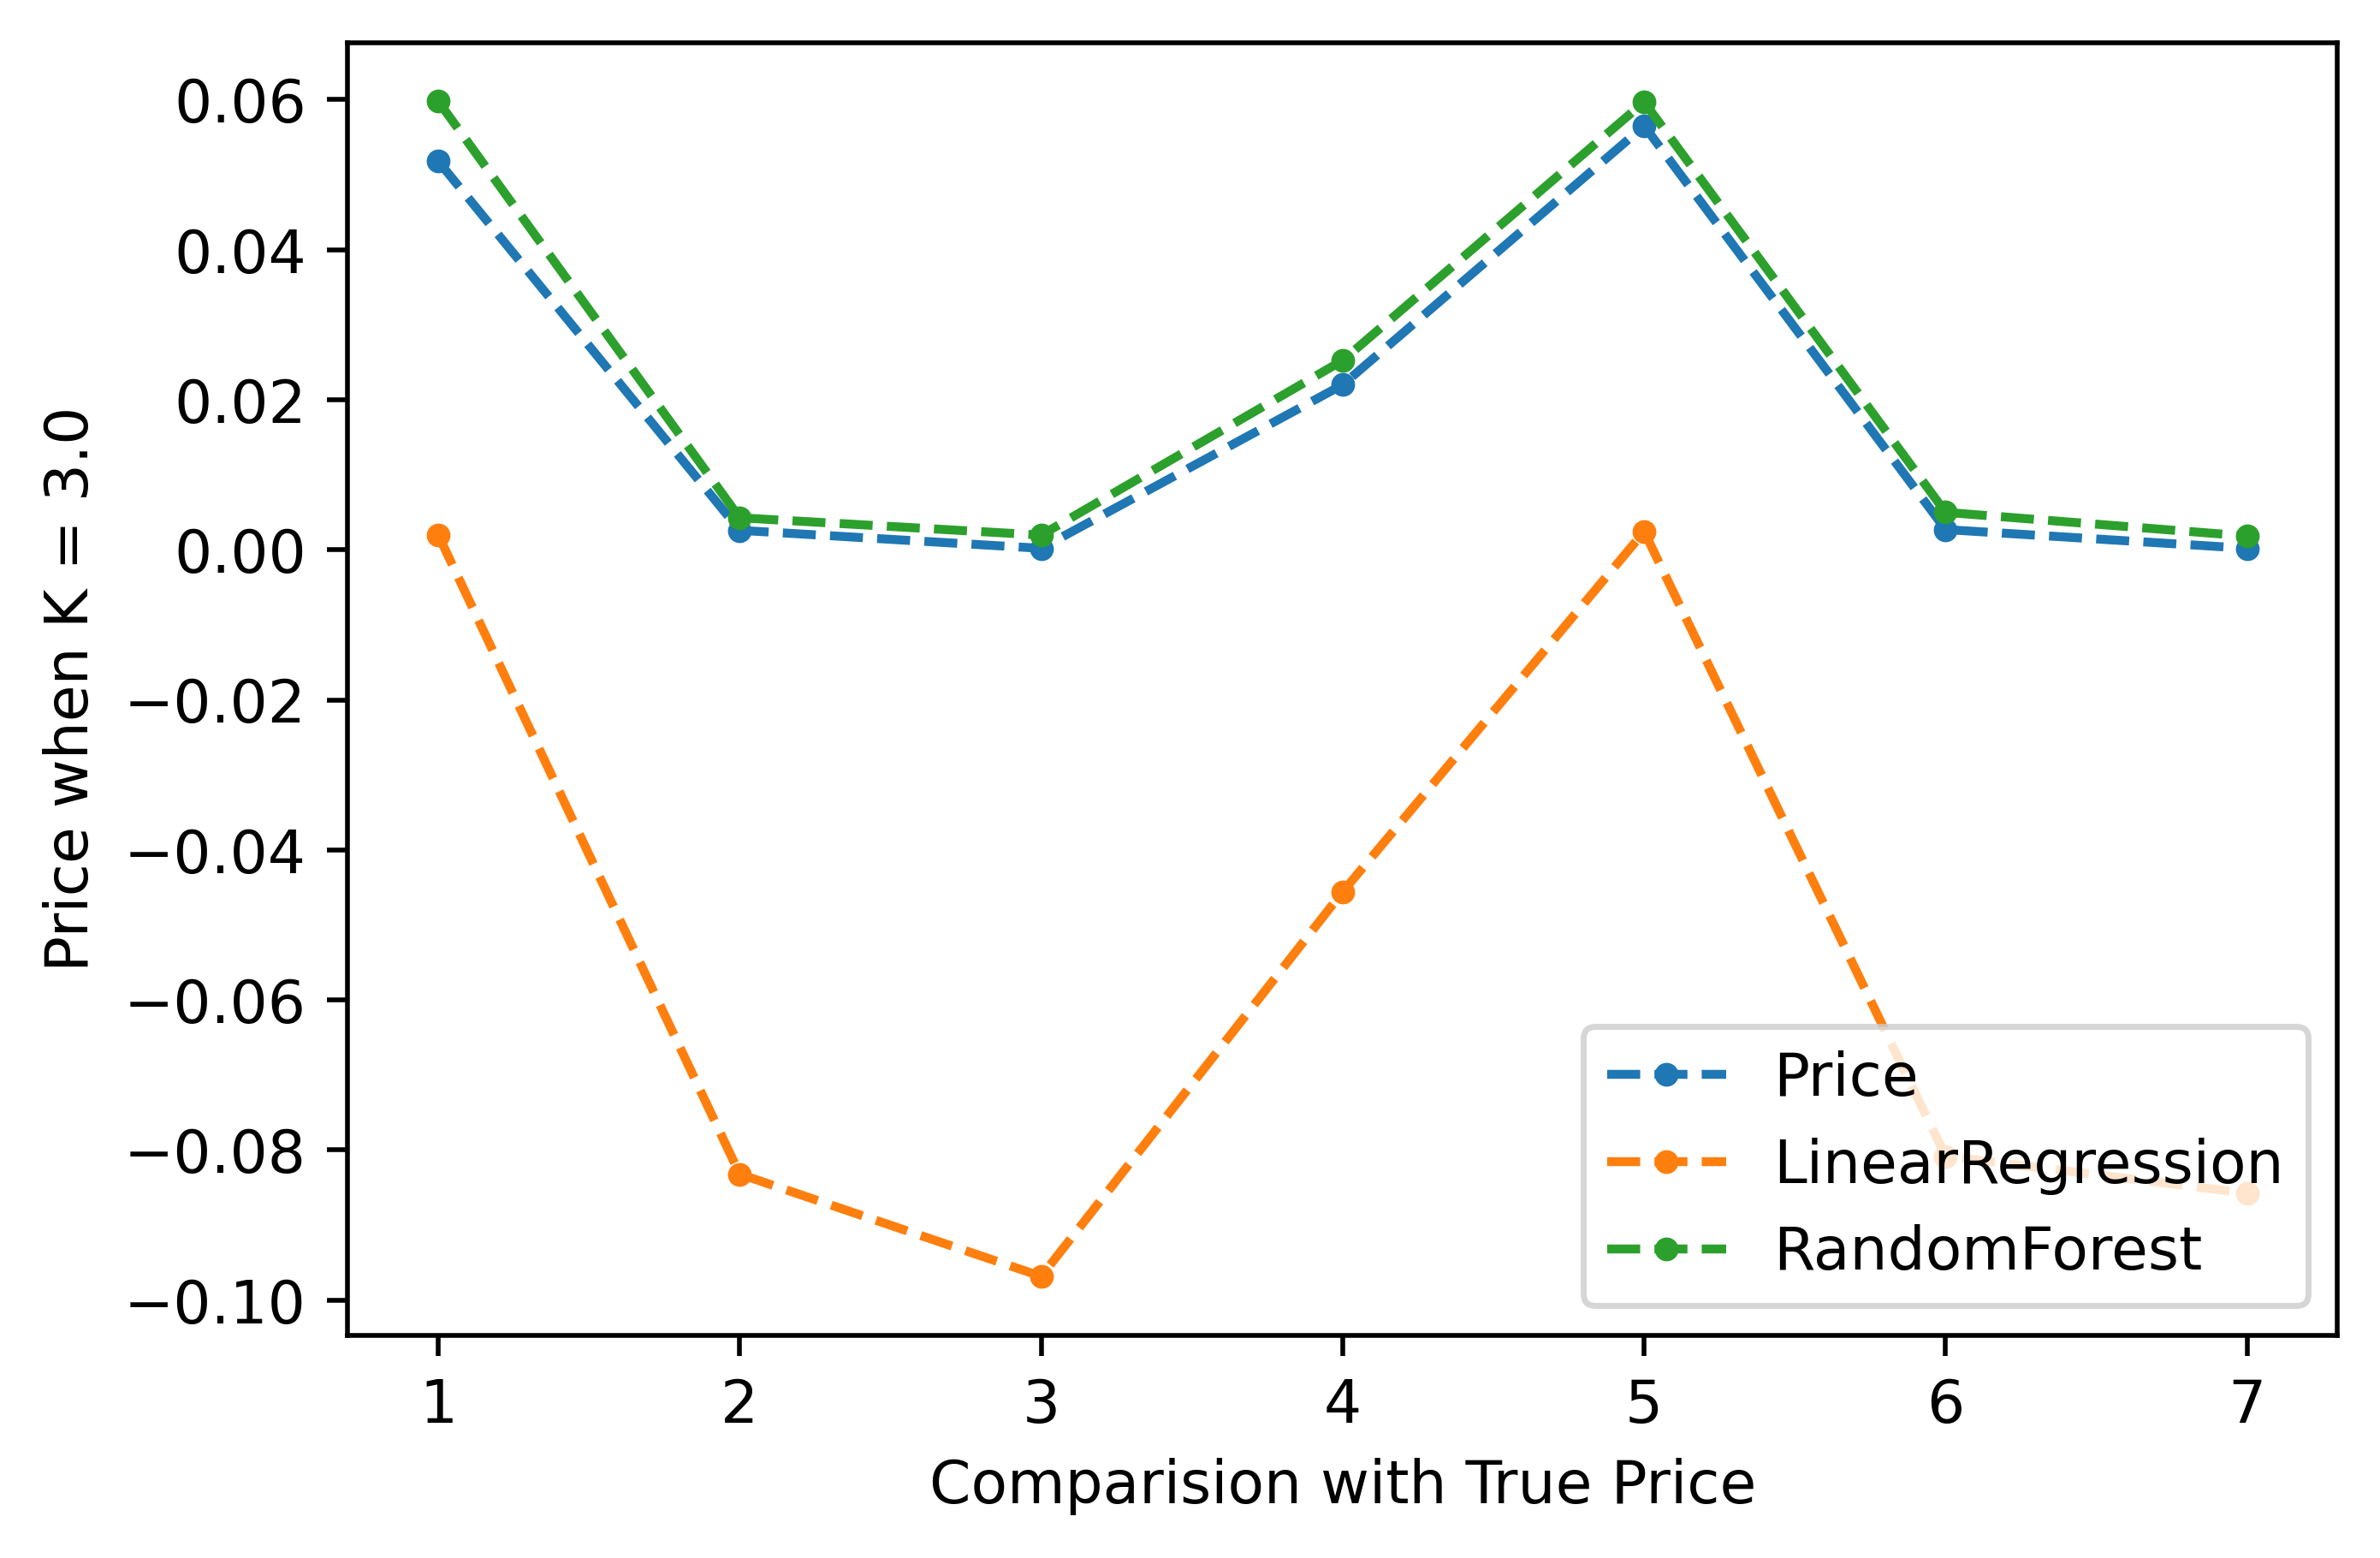

In [ ]:
fig=plt.figure(dpi=500)
x=list(np.arange(1, 8))
plt.plot(x, t3.T[0],ls = "--",marker='.',label="Price")
plt.plot(x, t3.T[1],ls = "--",marker='.',label="LinearRegression")
plt.plot(x, t3.T[2],ls = "--",marker='.',label="RandomForest")
plt.xlabel("Comparision with True Price")
plt.ylabel("Price when K = 3.0")
plt.legend(loc="lower right")
#show出图形
plt.show()

#保存图片
fig.savefig("./data/行权价3000一周预测图")